In [37]:
!pip install psycopg2-binary



In [40]:
#from sqlalchemy import create_engine, text

#username = 'mia17-hackaton'
#password = 'hackaton-mia17'
#host = 'postgresql-mia17-hackaton.alwaysdata.net'
#port = '5432'
#database = 'mia17-hackaton_psql'

# Notez l'ajout de +psycopg2 après postgresql
#connection_url = f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}'
#connection_url = f'postgresql://{username}:{password}@{host}:{port}/{database}'

#engine = create_engine(connection_url)


# Connection à la BD

In [356]:
# Remplacer avec vos informations de connexion
hostname = 'postgresql-mia17-hackaton.alwaysdata.net'
username = 'mia17-hackaton'
password = 'hackaton-mia17'
database = 'mia17-hackaton_psql'

conn = psycopg2.connect(
    host=hostname,
    user=username,
    password=password,
    dbname=database
)

# dataset olympic_atheletes

In [357]:
query = "SELECT * FROM olympic_athletes" # Remplacer nom_de_la_table par le nom de votre table
data_olympic_athelete = pd.read_sql_query(query, conn)

/Users/barrysalam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [358]:
#Affichage des 4 premeieres lignes
data_olympic_athelete.head()

,_id,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,24603,https://olympics.com/en/athletes/petit-jesus-n...,Petit Jesus NGNITEDEM,1,Athens 2004,None,None,None
1,24604,https://olympics.com/en/athletes/hamid-ait-big...,Hamid AIT BIGHRADE,1,Athens 2004,None,None,None
2,24605,https://olympics.com/en/athletes/abner-mares-m...,Abner MARES MARTINEZ,1,Athens 2004,None,None,None
3,24606,https://olympics.com/en/athletes/argenis-mendez,Argenis MENDEZ,1,Athens 2004,None,None,None
4,24607,https://olympics.com/en/athletes/joel-brunker,Joel BRUNKER,1,Athens 2004,None,None,None


In [359]:
data_olympic_athelete.count()

_id                     75904
athlete_url             75904
athlete_full_name       75904
games_participations    75904
first_game              75882
athlete_year_birth          0
athlete_medals          15352
bio                     22842
dtype: int64

In [360]:
data_olympic_athelete.count()

_id                     75904
athlete_url             75904
athlete_full_name       75904
games_participations    75904
first_game              75882
athlete_year_birth          0
athlete_medals          15352
bio                     22842
dtype: int64

In [361]:
data_olympic_athelete.shape

(75904, 8)

In [362]:
#Identifier et compter les valeurs manquantes
data_olympic_athelete.isnull().sum()

_id                         0
athlete_url                 0
athlete_full_name           0
games_participations        0
first_game                 22
athlete_year_birth      75904
athlete_medals          60552
bio                     53062
dtype: int64

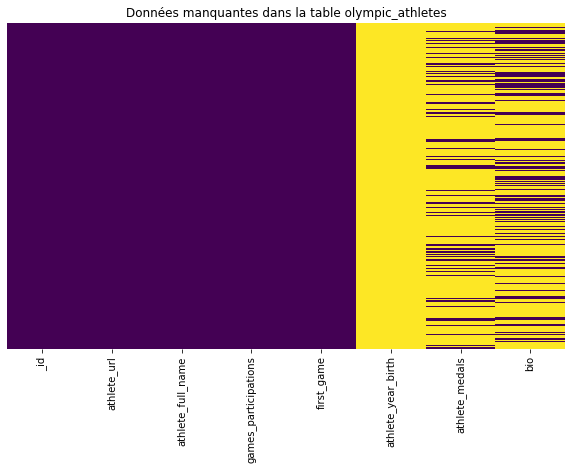

In [363]:
# Visualiser les données manquantes avec un heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(data_olympic_athelete.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Données manquantes dans la table olympic_athletes')
plt.show()

In [364]:
# Afficher les statistiques descriptives pour les colonnes numériques
data_olympic_athelete.describe()

,_id,games_participations
count,75904.000000,75904.000000
mean,37951.500000,1.535874
std,21911.741753,0.854563
min,0.000000,0.000000
25%,18975.750000,1.000000
50%,37951.500000,1.000000
75%,56927.250000,2.000000
max,75903.000000,10.000000


In [365]:
data_olympic_athelete.drop(columns=['_id', 'athlete_year_birth', 'bio'], inplace=True)
data_olympic_athelete

,athlete_url,athlete_full_name,games_participations,first_game,athlete_medals
0,https://olympics.com/en/athletes/petit-jesus-n...,Petit Jesus NGNITEDEM,1,Athens 2004,None
1,https://olympics.com/en/athletes/hamid-ait-big...,Hamid AIT BIGHRADE,1,Athens 2004,None
2,https://olympics.com/en/athletes/abner-mares-m...,Abner MARES MARTINEZ,1,Athens 2004,None
3,https://olympics.com/en/athletes/argenis-mendez,Argenis MENDEZ,1,Athens 2004,None
4,https://olympics.com/en/athletes/joel-brunker,Joel BRUNKER,1,Athens 2004,None
...,...,...,...,...,...
75899,https://olympics.com/en/athletes/zsolt-bedak,Zsolt BEDAK,1,Athens 2004,None
75900,https://olympics.com/en/athletes/aibek-abdymom...,Aibek ABDYMOMUNOV,1,Athens 2004,None
75901,https://olympics.com/en/athletes/yuan-liu,Yuan LIU,1,Athens 2004,None
75902,https://olympics.com/en/athletes/juan-lopez-1,Juan LOPEZ,1,Athens 2004,None


In [370]:
import numpy as np
# Remplacer les valeurs 'None' par np.nan dans la colonne 'medal'
data_olympic_athelete['athlete_medals'].replace('None', np.nan, inplace=True)


In [372]:
# Remplacer les valeurs np.nan par 0 dans la colonne 'medal'
data_olympic_athelete['athlete_medals'].fillna(0, inplace=True)
data_olympic_athelete

,athlete_url,athlete_full_name,games_participations,first_game,athlete_medals
0,https://olympics.com/en/athletes/petit-jesus-n...,Petit Jesus NGNITEDEM,1,Athens 2004,0
1,https://olympics.com/en/athletes/hamid-ait-big...,Hamid AIT BIGHRADE,1,Athens 2004,0
2,https://olympics.com/en/athletes/abner-mares-m...,Abner MARES MARTINEZ,1,Athens 2004,0
3,https://olympics.com/en/athletes/argenis-mendez,Argenis MENDEZ,1,Athens 2004,0
4,https://olympics.com/en/athletes/joel-brunker,Joel BRUNKER,1,Athens 2004,0
...,...,...,...,...,...
75899,https://olympics.com/en/athletes/zsolt-bedak,Zsolt BEDAK,1,Athens 2004,0
75900,https://olympics.com/en/athletes/aibek-abdymom...,Aibek ABDYMOMUNOV,1,Athens 2004,0
75901,https://olympics.com/en/athletes/yuan-liu,Yuan LIU,1,Athens 2004,0
75902,https://olympics.com/en/athletes/juan-lopez-1,Juan LOPEZ,1,Athens 2004,0


In [375]:
#data_olympic_athelete["athlete_medals"].isnull().sum()
data_olympic_athelete.isnull().sum()

athlete_url              0
athlete_full_name        0
games_participations     0
first_game              22
athlete_medals           0
dtype: int64

# dataset olympic_hosts

In [312]:
query = "SELECT * FROM olympic_hosts" # Remplacer nom_de_la_table par le nom de votre table
data_olympic_hosts = pd.read_sql_query(query, conn)

/Users/barrysalam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [316]:
#Affichage des 4 premeieres lignes
data_olympic_hosts.head()

,_id,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year
0,0,beijing-2022,2022-02-20 13:00:00,2022-02-04 16:00:00,China,Beijing 2022,Winter,2022
1,1,tokyo-2020,2021-08-08 16:00:00,2021-07-23 13:00:00,Japan,Tokyo 2020,Summer,2020
2,2,pyeongchang-2018,2018-02-25 09:00:00,2018-02-09 00:00:00,Republic of Korea,PyeongChang 2018,Winter,2018
3,3,rio-2016,2016-08-21 23:00:00,2016-08-05 14:00:00,Brazil,Rio 2016,Summer,2016
4,4,sochi-2014,2014-02-23 17:00:00,2014-02-07 05:00:00,Russian Federation,Sochi 2014,Winter,2014


In [325]:
#Affichage de la taille de mon dataset
data_olympic_hosts.columns

Index(['_id', 'game_slug', 'game_end_date', 'game_start_date', 'game_location',
       'game_name', 'game_season', 'game_year', 'game_duration_days',
       'decade'],
      dtype='object')

In [326]:
#Identifier et compter les valeurs manquantes
data_olympic_hosts.isnull().sum()

_id                   0
game_slug             0
game_end_date         0
game_start_date       0
game_location         0
game_name             0
game_season           0
game_year             0
game_duration_days    0
decade                0
dtype: int64

In [319]:
# Convertir les colonnes de date en datetime
data_olympic_hosts['game_start_date'] = pd.to_datetime(data_olympic_hosts['game_start_date'])
data_olympic_hosts['game_end_date'] = pd.to_datetime(data_olympic_hosts['game_end_date'])


In [321]:
# Ajouter une colonne de durée des jeux en jours
data_olympic_hosts['game_duration_days'] = (data_olympic_hosts['game_end_date'] - data_olympic_hosts['game_start_date']).dt.days
data_olympic_hosts

,_id,game_slug,game_end_date,game_start_date,game_location,game_name,game_season,game_year,game_duration_days
0,0,beijing-2022,2022-02-20 13:00:00,2022-02-04 16:00:00,China,Beijing 2022,Winter,2022,15
1,1,tokyo-2020,2021-08-08 16:00:00,2021-07-23 13:00:00,Japan,Tokyo 2020,Summer,2020,16
2,2,pyeongchang-2018,2018-02-25 09:00:00,2018-02-09 00:00:00,Republic of Korea,PyeongChang 2018,Winter,2018,16
3,3,rio-2016,2016-08-21 23:00:00,2016-08-05 14:00:00,Brazil,Rio 2016,Summer,2016,16
4,4,sochi-2014,2014-02-23 17:00:00,2014-02-07 05:00:00,Russian Federation,Sochi 2014,Winter,2014,16
5,5,london-2012,2012-08-12 21:00:00,2012-07-27 09:00:00,Great Britain,London 2012,Summer,2012,16
6,6,vancouver-2010,2010-02-28 05:00:00,2010-02-12 17:00:00,Canada,Vancouver 2010,Winter,2010,15
7,7,beijing-2008,2008-08-24 14:00:00,2008-08-08 02:00:00,China,Beijing 2008,Summer,2008,16
8,8,turin-2006,2006-02-26 20:00:00,2006-02-10 08:00:00,Italy,Turin 2006,Winter,2006,16
9,9,athens-2004,2004-08-29 20:00:00,2004-08-13 08:00:00,Greece,Athens 2004,Summer,2004,16


# Exploration et visualisation

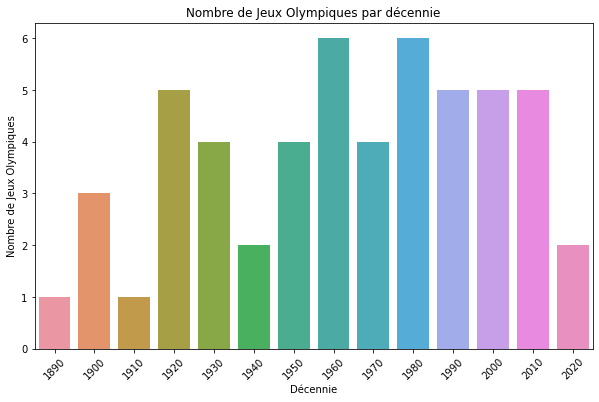

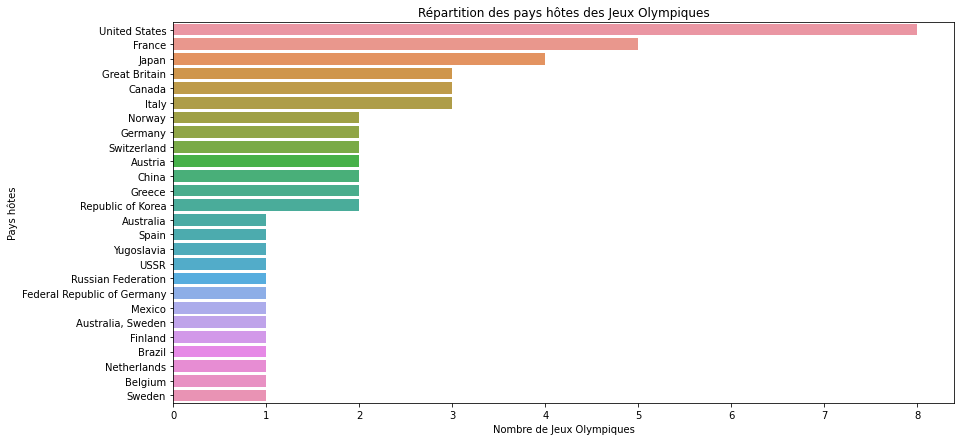

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des Jeux Olympiques par décennie
data_olympic_hosts['decade'] = (data_olympic_hosts['game_year'].astype(int) // 10) * 10
plt.figure(figsize=(10, 6))
sns.countplot(x='decade', data=data_olympic_hosts)
plt.title("Nombre de Jeux Olympiques par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre de Jeux Olympiques")
plt.xticks(rotation=45)
plt.show()

# Répartition des pays hôtes
plt.figure(figsize=(14, 7))
sns.countplot(y='game_location', data=data_olympic_hosts, order=data_olympic_hosts['game_location'].value_counts().index)
plt.title("Répartition des pays hôtes des Jeux Olympiques")
plt.xlabel("Nombre de Jeux Olympiques")
plt.ylabel("Pays hôtes")
plt.show()


# Analyse des saisons des Jeux Olympiques
# Nombre de Jeux d'été et d'hiver par décennie
# Analyse des durées des Jeux d'été par rapport aux Jeux d'hiver

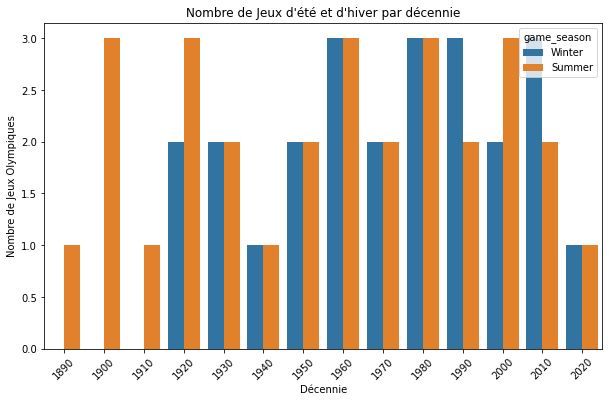

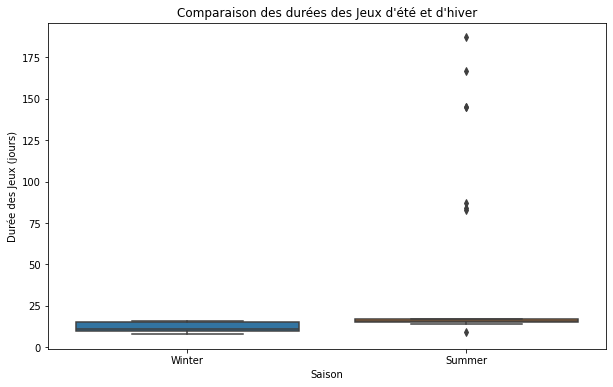

In [333]:
# Nombre de Jeux d'été et d'hiver par décennie
plt.figure(figsize=(10, 6))
sns.countplot(x='decade', hue='game_season', data=data_olympic_hosts)
plt.title("Nombre de Jeux d'été et d'hiver par décennie")
plt.xlabel("Décennie")
plt.ylabel("Nombre de Jeux Olympiques")
plt.xticks(rotation=45)
plt.show()

# Analyse des durées des Jeux d'été par rapport aux Jeux d'hiver
plt.figure(figsize=(10, 6))
sns.boxplot(x='game_season', y='game_duration_days', data=data_olympic_hosts)
plt.title("Comparaison des durées des Jeux d'été et d'hiver")
plt.xlabel("Saison")
plt.ylabel("Durée des Jeux (jours)")
plt.show()


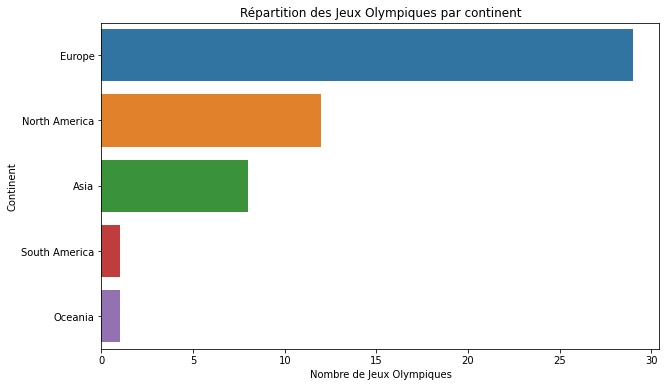

In [337]:
# Ajout d'une colonne de continent (exemple de correspondance simple)
continent_map = {
    'China': 'Asia', 'Japan': 'Asia', 'Republic of Korea': 'Asia', 'Brazil': 'South America', 'Russian Federation': 'Europe',
    'Great Britain': 'Europe', 'Canada': 'North America', 'Italy': 'Europe', 'Greece': 'Europe', 'United States': 'North America',
    'Australia': 'Oceania', 'Norway': 'Europe', 'Spain': 'Europe', 'France': 'Europe', 'Mexico': 'North America', 'Finland': 'Europe',
    'Germany': 'Europe', 'Netherlands': 'Europe', 'Belgium': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe',
    'USSR': 'Europe', 'Yugoslavia': 'Europe', 'Austria': 'Europe'
}
data_olympic_hosts['continent'] = data_olympic_hosts['game_location'].map(continent_map)

# Répartition des Jeux Olympiques par continent
plt.figure(figsize=(10, 6))
sns.countplot(y='continent', data=data_olympic_hosts, order=data_olympic_hosts['continent'].value_counts().index)
plt.title("Répartition des Jeux Olympiques par continent")
plt.xlabel("Nombre de Jeux Olympiques")
plt.ylabel("Continent")
plt.show()

# Pays ayant accueilli le plus de Jeux Olympiques
#plt.figure(figsize=(14, 7))
#sns.countplot(y='game_location', data=data_olympic_hosts, order=data_olympic_hosts['game_location'].value_counts().index)
#plt.title("Pays ayant accueilli le plus de Jeux Olympiques")
#plt.xlabel("Nombre de Jeux Olympiques")
#plt.ylabel("Pays")
#plt.show()


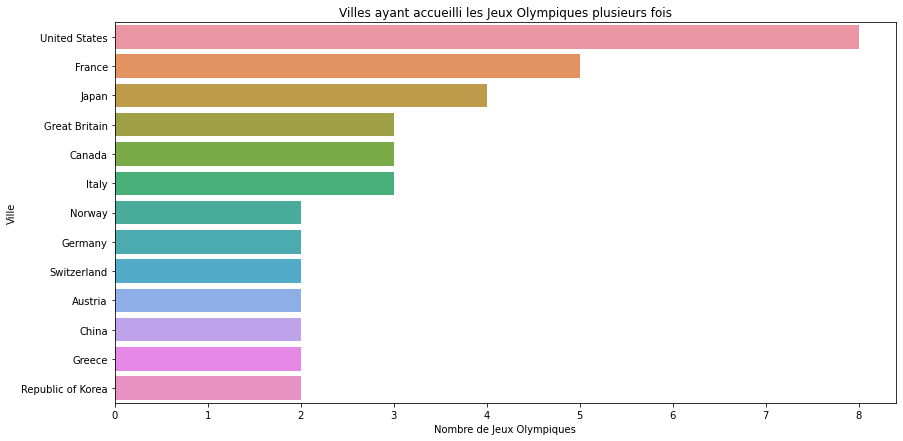

/var/folders/6c/2p4t32h968ldf5t9b7vybr300000gn/T/ipykernel_66918/4175025616.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_city['next_game_year'] = same_city.groupby('game_location')['game_year'].shift(-1)
/var/folders/6c/2p4t32h968ldf5t9b7vybr300000gn/T/ipykernel_66918/4175025616.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  same_city['years_between'] = same_city['next_game_year'] - same_city['game_year']


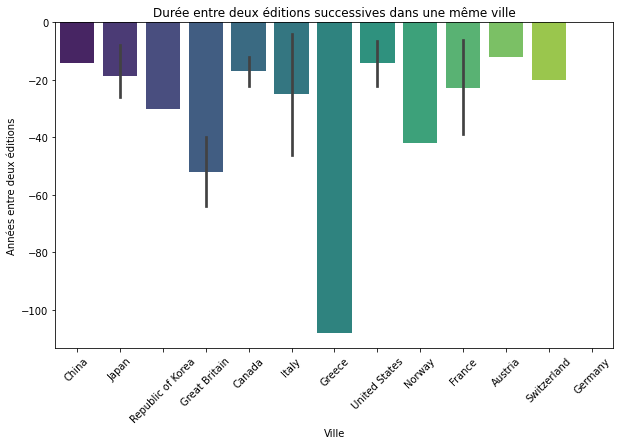

In [338]:
# Villes ayant accueilli les Jeux Olympiques plusieurs fois
multiple_hosts = data_olympic_hosts['game_location'].value_counts()
multiple_hosts = multiple_hosts[multiple_hosts > 1]

plt.figure(figsize=(14, 7))
sns.countplot(y='game_location', data=data_olympic_hosts[data_olympic_hosts['game_location'].isin(multiple_hosts.index)], order=multiple_hosts.index)
plt.title("Villes ayant accueilli les Jeux Olympiques plusieurs fois")
plt.xlabel("Nombre de Jeux Olympiques")
plt.ylabel("Ville")
plt.show()

# Analyse de la durée entre deux éditions successives dans une même ville
same_city = data_olympic_hosts[data_olympic_hosts.duplicated(['game_location'], keep=False)]
same_city['next_game_year'] = same_city.groupby('game_location')['game_year'].shift(-1)
same_city['years_between'] = same_city['next_game_year'] - same_city['game_year']

plt.figure(figsize=(10, 6))
sns.barplot(x='game_location', y='years_between', data=same_city.dropna(), palette="viridis")
plt.title("Durée entre deux éditions successives dans une même ville")
plt.xlabel("Ville")
plt.ylabel("Années entre deux éditions")
plt.xticks(rotation=45)
plt.show()


# Application des modèles de machine learning
# Classification : Prédiction de la saison des Jeux Olympiques

In [327]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encoder les labels
le = LabelEncoder()
data_olympic_hosts['game_season_encoded'] = le.fit_transform(data_olympic_hosts['game_season'])

# Sélection des caractéristiques et de la cible
X = data_olympic_hosts[['game_year', 'game_duration_days']]
y = data_olympic_hosts['game_season_encoded']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle RandomForest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

      Summer       1.00      0.67      0.80         9
      Winter       0.40      1.00      0.57         2

    accuracy                           0.73        11
   macro avg       0.70      0.83      0.69        11
weighted avg       0.89      0.73      0.76        11



# Régression : Prédiction de la durée des Jeux Olympiques

In [331]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sélection des caractéristiques et de la cible
X = data_olympic_hosts[['game_year']]
y = data_olympic_hosts['game_duration_days']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1819.839443258414
R-squared: 0.3127022634126707


#  Entraînement du modèle SVM

In [332]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Sélection des caractéristiques et de la cible
X = data_olympic_hosts[['game_year', 'game_duration_days']]
y = data_olympic_hosts['game_season_encoded']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle SVM
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

      Summer       1.00      0.78      0.88         9
      Winter       0.50      1.00      0.67         2

    accuracy                           0.82        11
   macro avg       0.75      0.89      0.77        11
weighted avg       0.91      0.82      0.84        11



# dataset olympic_medals

In [271]:
query = "SELECT * FROM olympic_medals" # Remplacer nom_de_la_table par le nom de votre table
data_olympic_medals = pd.read_sql_query(query, conn)

/Users/barrysalam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [272]:
data_olympic_medals.head()

,_id,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,0,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/stefania-cons...,Stefania CONSTANTINI,Italy,IT,ITA
1,1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
2,2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
3,3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
4,4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE


In [273]:
data_olympic_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21697 entries, 0 to 21696
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   _id                    21697 non-null  int64 
 1   discipline_title       21697 non-null  object
 2   slug_game              21697 non-null  object
 3   event_title            21697 non-null  object
 4   event_gender           21697 non-null  object
 5   medal_type             21697 non-null  object
 6   participant_type       21697 non-null  object
 7   participant_title      6584 non-null   object
 8   athlete_url            17027 non-null  object
 9   athlete_full_name      18073 non-null  object
 10  country_name           21697 non-null  object
 11  country_code           20195 non-null  object
 12  country_3_letter_code  21697 non-null  object
dtypes: int64(1), object(12)
memory usage: 2.2+ MB


In [301]:
# Dropping the unnecessary index column 'Unnamed: 0'
cleaned_data = data['_id'].drop(columns=['Unnamed: 0', 'participant_title', 'athlete_url'])
#data_olympic_medals

In [280]:
# Checking for missing values
missing_values = cleaned_data.isnull().sum()
data_olympic_medals, missing_values

(         _id discipline_title     slug_game                      event_title  \
 0          0          Curling  beijing-2022                    Mixed Doubles   
 1          1          Curling  beijing-2022                    Mixed Doubles   
 2          2          Curling  beijing-2022                    Mixed Doubles   
 3          3          Curling  beijing-2022                    Mixed Doubles   
 4          4          Curling  beijing-2022                    Mixed Doubles   
 ...      ...              ...           ...                              ...   
 21692  21692    Weightlifting   athens-1896  heavyweight - one hand lift men   
 21693  21693    Weightlifting   athens-1896  heavyweight - one hand lift men   
 21694  21694    Weightlifting   athens-1896  heavyweight - two hand lift men   
 21695  21695    Weightlifting   athens-1896  heavyweight - two hand lift men   
 21696  21696    Weightlifting   athens-1896  heavyweight - two hand lift men   
 
       event_gender medal_

In [281]:
# Suppression des lignes en double
data_olympic_medals.drop_duplicates(inplace=True)

In [282]:
# Remplacer les valeurs manquantes par la moyenne pour les colonnes numériques
data_olympic_medals.fillna(data_olympic_medals.mean(), inplace=True)

/var/folders/6c/2p4t32h968ldf5t9b7vybr300000gn/T/ipykernel_66918/337012096.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_olympic_medals.fillna(data_olympic_medals.mean(), inplace=True)


In [285]:
# Standardisation des noms des colonnes
data_olympic_medals.columns = data_olympic_medals.columns .str.strip().str.lower().str.replace(' ', '_')
#data_olympic_medals

In [289]:
# Nettoyage des espaces et des caractères spéciaux dans les colonnes de type chaîne
for col in data_olympic_medals.select_dtypes(include=['object']).columns:
    data_olympic_medals[col] = data_olympic_medals[col].str.strip().str.replace(r'[^\w\s]', '', regex=True)
#data_olympic_medals

# Exploratory Data Analysis (EDA) and Model Preparation

In [305]:
# Remplacer les valeurs manquantes pour les colonnes non numériques par une valeur par défaut
data_olympic_medals.fillna('Valeur par défaut', inplace=True)


In [306]:
data_olympic_medals.head(100)

,_id,discipline_title,slug_game,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,0,Curling,beijing2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,httpsolympicscomenathletesstefaniaconstantini,Stefania CONSTANTINI,Italy,IT,ITA
1,1,Curling,beijing2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,httpsolympicscomenathletesamosmosaner,Amos MOSANER,Italy,IT,ITA
2,2,Curling,beijing2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,httpsolympicscomenathleteskristinskaslien,Kristin SKASLIEN,Norway,NO,NOR
3,3,Curling,beijing2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,httpsolympicscomenathletesmagnusnedregotten,Magnus NEDREGOTTEN,Norway,NO,NOR
4,4,Curling,beijing2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,httpsolympicscomenathletesalmidadeval,Almida DE VAL,Sweden,SE,SWE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,94,Snowboard,beijing2022,Womens Snowboard Big Air,Women,SILVER,Athlete,Valeur par défaut,httpsolympicscomenathleteszoisadowskisynnott,Zoi SADOWSKI SYNNOTT,New Zealand,NZ,NZL
96,95,Snowboard,beijing2022,Womens Snowboard Big Air,Women,GOLD,Athlete,Valeur par défaut,httpsolympicscomenathletesannagasser,Anna GASSER,Austria,AT,AUT
97,96,Snowboard,beijing2022,Mens Snowboard Cross,Men,BRONZE,Athlete,Valeur par défaut,httpsolympicscomenathletesomarvisintin,Omar VISINTIN,Italy,IT,ITA
98,97,Snowboard,beijing2022,Mens Snowboard Cross,Men,SILVER,Athlete,Valeur par défaut,httpsolympicscomenathleteseliotgrondin,Eliot GRONDIN,Canada,CA,CAN


In [307]:
data_olympic_medals.isnull().sum()

_id                      0
discipline_title         0
slug_game                0
event_title              0
event_gender             0
medal_type               0
participant_type         0
participant_title        0
athlete_url              0
athlete_full_name        0
country_name             0
country_code             0
country_3_letter_code    0
dtype: int64

In [308]:
data_olympic_medals.duplicated().sum()

0

In [309]:
data_olympic_medals = data_olympic_medals.rename({'slug_game':'game_slug'},axis=1)
data_olympic_medals

,_id,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,0,Curling,beijing2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,httpsolympicscomenathletesstefaniaconstantini,Stefania CONSTANTINI,Italy,IT,ITA
1,1,Curling,beijing2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,httpsolympicscomenathletesamosmosaner,Amos MOSANER,Italy,IT,ITA
2,2,Curling,beijing2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,httpsolympicscomenathleteskristinskaslien,Kristin SKASLIEN,Norway,NO,NOR
3,3,Curling,beijing2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,httpsolympicscomenathletesmagnusnedregotten,Magnus NEDREGOTTEN,Norway,NO,NOR
4,4,Curling,beijing2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,httpsolympicscomenathletesalmidadeval,Almida DE VAL,Sweden,SE,SWE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21692,21692,Weightlifting,athens1896,heavyweight one hand lift men,Men,SILVER,Athlete,Valeur par défaut,httpsolympicscomenathletesviggojensen,Viggo JENSEN,Denmark,DK,DEN
21693,21693,Weightlifting,athens1896,heavyweight one hand lift men,Men,BRONZE,Athlete,Valeur par défaut,Valeur par défaut,Alexandros Nikolopoulos,Greece,GR,GRE
21694,21694,Weightlifting,athens1896,heavyweight two hand lift men,Men,GOLD,Athlete,Valeur par défaut,httpsolympicscomenathletesviggojensen,Viggo JENSEN,Denmark,DK,DEN
21695,21695,Weightlifting,athens1896,heavyweight two hand lift men,Men,SILVER,Athlete,Valeur par défaut,httpsolympicscomenathleteslauncestonelliot1,Launceston ELLIOT,Great Britain,GB,GBR


In [310]:
# Nettoyage des espaces et des caractères spéciaux dans les colonnes de type chaîne
for col in data_olympic_medals.select_dtypes(include=['object']).columns:
    data_olympic_medals[col] = data_olympic_medals[col].str.strip().str.replace(r'[^\w\s]', '', regex=True)

In [311]:
data_olympic_medals.head(10)

,_id,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,0,Curling,beijing2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,httpsolympicscomenathletesstefaniaconstantini,Stefania CONSTANTINI,Italy,IT,ITA
1,1,Curling,beijing2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,httpsolympicscomenathletesamosmosaner,Amos MOSANER,Italy,IT,ITA
2,2,Curling,beijing2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,httpsolympicscomenathleteskristinskaslien,Kristin SKASLIEN,Norway,NO,NOR
3,3,Curling,beijing2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,httpsolympicscomenathletesmagnusnedregotten,Magnus NEDREGOTTEN,Norway,NO,NOR
4,4,Curling,beijing2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,httpsolympicscomenathletesalmidadeval,Almida DE VAL,Sweden,SE,SWE
5,5,Curling,beijing2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,httpsolympicscomenathletesoskareriksson,Oskar ERIKSSON,Sweden,SE,SWE
6,6,Curling,beijing2022,Women,Women,GOLD,GameTeam,Great Britain,Valeur par défaut,Valeur par défaut,Great Britain,GB,GBR
7,7,Curling,beijing2022,Women,Women,SILVER,GameTeam,Japan,Valeur par défaut,Valeur par défaut,Japan,JP,JPN
8,8,Curling,beijing2022,Women,Women,BRONZE,GameTeam,Sweden,Valeur par défaut,Valeur par défaut,Sweden,SE,SWE
9,9,Curling,beijing2022,Men,Men,GOLD,GameTeam,Sweden,Valeur par défaut,Valeur par défaut,Sweden,SE,SWE


# dataset results

In [225]:
query = "SELECT * FROM olympic_results" # Remplacer nom_de_la_table par le nom de votre table
data_olympic_results = pd.read_sql_query(query, conn)

/Users/barrysalam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [226]:
data_olympic_results.head(10)

,_id,discipline_title,event_title,slug_game,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type
0,162113,Fencing,foil individual men,athens-1896,Athlete,BRONZE,None,True,3.0,Greece,GR,GRE,None,Periklis Pierrakos-Mavromikhalis,None,None
1,162114,Fencing,foil individual men,athens-1896,Athlete,None,None,True,5.0,Greece,GR,GRE,https://olympics.com/en/athletes/konstantinos-...,Konstantinos KOMNINOS-MILIOTIS,None,None
2,162115,Fencing,foil individual men,athens-1896,Athlete,None,None,True,5.0,France,FR,FRA,https://olympics.com/en/athletes/henri-de-laborde,Henri DE LABORDE,None,None
3,162116,Fencing,foil individual men,athens-1896,Athlete,None,None,True,7.0,Greece,GR,GRE,https://olympics.com/en/athletes/ioannis-poulos,Ioannis POULOS,None,None
4,162117,Fencing,foil individual men,athens-1896,Athlete,None,None,True,7.0,Greece,GR,GRE,None,Georgios Valakakis,None,None
5,162118,Fencing,sabre individual men,athens-1896,Athlete,GOLD,None,None,1.0,Greece,GR,GRE,https://olympics.com/en/athletes/ioannis-georg...,Ioannis GEORGIADIS,None,None
6,162119,Fencing,sabre individual men,athens-1896,Athlete,SILVER,None,None,2.0,Greece,GR,GRE,None,Tilemakhos Karakalos,None,None
7,162120,Fencing,sabre individual men,athens-1896,Athlete,BRONZE,None,None,3.0,Denmark,DK,DEN,https://olympics.com/en/athletes/holger-nielsen-1,Holger NIELSEN,None,None
8,162121,Fencing,sabre individual men,athens-1896,Athlete,None,None,None,4.0,Austria,AT,AUT,https://olympics.com/en/athletes/adolf-schmal,Adolf SCHMAL,None,None
9,162122,Fencing,sabre individual men,athens-1896,Athlete,None,None,None,5.0,Greece,GR,GRE,https://olympics.com/en/athletes/georgios-iatr...,Georgios IATRIDIS,None,None


In [239]:
data_olympic_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162804 entries, 0 to 162803
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   _id                    162804 non-null  int64  
 1   discipline_title       162804 non-null  object 
 2   event_title            162804 non-null  object 
 3   slug_game              162804 non-null  object 
 4   participant_type       162804 non-null  object 
 5   medal_type             20206 non-null   object 
 6   athletes               7976 non-null    object 
 7   rank_equal             32525 non-null   object 
 8   rank_position          144721 non-null  float64
 9   country_name           162804 non-null  object 
 10  country_code           157751 non-null  object 
 11  country_3_letter_code  162802 non-null  object 
 12  athlete_url            130021 non-null  object 
 13  athlete_full_name      141666 non-null  object 
 14  value_unit             78649 non-nul

In [240]:
data_olympic_results.isnull().sum()

_id                           0
discipline_title              0
event_title                   0
slug_game                     0
participant_type              0
medal_type               142598
athletes                 154828
rank_equal               130279
rank_position             18083
country_name                  0
country_code               5053
country_3_letter_code         2
athlete_url               32783
athlete_full_name         21138
value_unit                84155
value_type                72765
dtype: int64

In [241]:
data_olympic_results.value_counts()

Series([], dtype: int64)

# Separation des Données et preparation

In [262]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Supposons que 'data_olympic_medals' est votre DataFrame
# Séparation des caractéristiques (X) et de la cible (y)
X = data_olympic_athelete.drop('medal_type', axis=1)
y = data_olympic_athelete['medal_type']

# Identifier les colonnes catégorielles
categorical_features = X.select_dtypes(include=['object']).columns

# Appliquer OneHotEncoder aux colonnes catégorielles avec handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Ne rien faire aux colonnes restantes (non catégorielles)
)

# Encoder la variable cible
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le pipeline complet avec la transformation et le modèle de classification
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200))
])

# Entraîner le modèle
pipeline.fit(X_train, y_train)

# Prédire les valeurs de l'ensemble de test
y_pred = pipeline.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Si vous voulez voir les prédictions sous forme de libellés d'origine :
y_pred_labels = label_encoder.inverse_transform(y_pred)
print(y_pred_labels)


Accuracy: 0.3456221198156682
['BRONZE' 'BRONZE' 'BRONZE' ... 'GOLD' 'BRONZE' 'BRONZE']


/Users/barrysalam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Régression Linéaire

In [255]:
# Créer le modèle
#lr_model = LinearRegression()


In [259]:
# Entraîner le modèle
#lr_model.fit(X_train, y_train)